In [1]:
# Based on Tensorflow example notebook:
# https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/multilayer_perceptron.ipynb

In [19]:
import numpy as np
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve
import matplotlib.pyplot as plt

In [21]:
###load data first
#E1 data
#features = np.loadtxt("features_all.txt", delimiter=",")
#labels = np.loadtxt("labels_all.txt", delimiter=",")
#E2data
features = np.loadtxt("features_all_2.txt", delimiter=",")
labels = np.loadtxt("labels_all_2.txt", delimiter=",")
print(features.shape)
print(labels.shape)
print(features[1:5,1:5])
print(labels[1:5])
X = features
Y = np.array([labels, -(labels-1)]).T  # The model currently needs one column for each class

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1234)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(32955, 244)
(32955,)
[[65. 67. 61. 74.]
 [65. 63. 71. 62.]
 [61. 58. 74. 64.]
 [61. 85. 77. 71.]]
[1. 1. 1. 1.]
(24716, 244) (24716, 2)
(8239, 244) (8239, 2)


In [22]:
# Parameters
learning_rate = 0.001
training_epochs = 500
batch_size = 100
display_step = 5


# Network Parameters
n_hidden_1 = 122 # 1st layer number of features
n_hidden_2 = 122 # 2nd layer number of features
n_input = 244 # Number of feature
n_classes = 2 # Number of classes to predict


# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0001 cost= 809.262614910
Epoch: 0006 cost= 175.659435438
Epoch: 0011 cost= 110.167390373
Epoch: 0016 cost= 47.745340687
Epoch: 0021 cost= 52.025063381
Epoch: 0026 cost= 37.039580504
Epoch: 0031 cost= 91.133624670
Epoch: 0036 cost= 42.176896331
Epoch: 0041 cost= 29.496625225
Epoch: 0046 cost= 25.046920400
Epoch: 0051 cost= 78.977551968
Epoch: 0056 cost= 20.497475625
Epoch: 0061 cost= 12.690521942
Epoch: 0066 cost= 14.243535681
Epoch: 0071 cost= 65.741498353
Epoch: 0076 cost= 6.345838289
Epoch: 0081 cost= 8.188911847
Epoch: 0086 cost= 79.392806264
Epoch: 0091 cost= 11.061640063
Epoch: 0096 cost= 8.407275461
Epoch: 0101 cost= 4.471330345
Epoch: 0106 cost= 17.183726896
Epoch: 0111 cost= 3.293481638
Epoch: 0116 cost= 3.427301625
Epoch: 0121 cost= 7.363454088
Epoch: 0126 cost= 3.359789360
Epoch: 0131 cost= 6.933708136
Epoch: 0136 cost= 24.648531440
Epoch: 0141 cost= 3.251985554
Epoch: 0146 cost= 2.069341960
Epoch: 0151 cost= 5.096636923
Epoch: 0156 cost= 2.778164934
Epoch: 0161 cost= 

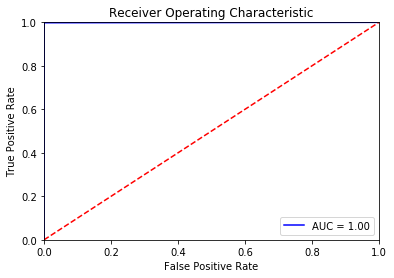

In [23]:
# Launch the graph

with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(X_train)/batch_size)
        X_batches = np.array_split(X_train, total_batch)
        Y_batches = np.array_split(Y_train, total_batch)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Training Accuracy:", accuracy.eval({x: X_train, y: Y_train}))
    print("Testing Accuracy:", accuracy.eval({x: X_test, y: Y_test}))
    global result 
    result = tf.argmax(pred, 1).eval({x: X_test, y: Y_test})
    result = np.array(result)
    #confusion matrix
    con_mat = confusion_matrix(Y_test[:,1], result)
    print("Confusion Matrix is: ", con_mat)
    
    #ROC curve
    fpr, tpr, threshold = roc_curve(Y_test[:,1], result)
    roc_auc = auc(fpr, tpr)

    # method I: plt

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()